In [5]:
from loadTDMS import *
from fft_test import *
import numpy as np
from tqdm import tqdm

# Do FFT in all path and in all revolution Before Normalization

In [6]:
date = 20230117

In [7]:
dt = 1/10**6
split_t_r = 0.1 # 1つの枠で全体のどの割合のデータを分析するか。
overlap = 0.5  # オーバーラップ率
window_F = "hamming"  # 窓関数選択: hanning, hamming, blackman
y_label = "amplitude"
y_unit = "V"

In [8]:
def get_tdms(num):
    load_path = rf"Z:\100 Raw_data\{date}---切削実験\AE\Cutting\AE_{num}.tdms"
#     load_path = rf"D:\users\park\100 Raw_data\20230113---切削実験\AE\Cutting\AE_{num}.tdms"

    d = load_tdms(load_path, ch_num=3)
    return d[1]
#     return d[1][36000*3:]
#     reurn d[1][[1000000*3:]

In [9]:
%%time
for i in tqdm(range(121,461)):
    d = get_tdms(i)
    fft_amp = np.array([])
    
    for j in range(0,1200):
        sample_num = 2**14
        start = j * 25000
        end = start + sample_num

        ds = d[start:end]
        
        N = len(ds)
        fq = np.linspace(0, N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
        
        fq_, amp_ = FFT_main(fq, ds, dt, split_t_r, overlap, window_F)
        amp_ = 20*np.log10(amp_)
#         amp_ = amp_[int(len(amp_)/10) * 0 : int(len(amp_)/10 * 1)]
    
        fft_amp = np.append(fft_amp, amp_)
        
    np.save(rf"Z:\200 Produced_data\20230113+0117\FFT\work\{i}",fft_amp)    
#     np.save(rf"D:\users\park\200 Produced_data\{date}\train_data\{i}",fft_amp)

100%|██████████| 340/340 [1:39:59<00:00, 17.64s/it]

Wall time: 1h 39min 59s


# Standardize with A(51-60path / 200-300kHz)
train data: A (51-60path / 200-300kHz)  
so i'll standardize not only train data but also test data with using A's avg and std

In [6]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [7]:
# Normalization class
mmsc=MinMaxScaler()
# Standardize class
stdsc = StandardScaler()

## Make Train Data

In [8]:
d = np.array([])
for i in range(51,61):
    temp = np.load(rf"Z:\200 Produced_data\20230113+0117\train_data\{i}.npy")
    d = np.append(d,temp)

In [14]:
d_stdsc = stdsc.fit_transform(d.reshape(-1,1))
print(stdsc.mean_)
print(np.sqrt(stdsc.var_))

[-84.4855937]
[2.92236362]


In [16]:
%matplotlib qt
# Check if there's outlier(smaller than -3 and bigger than 3 is usually outlier)
# After Checking there's some values bigger than 3 for example like over 5 but i'll just ignore it this time.
plt.plot(d_stdsc)

In [20]:
# Save Train data / Train data's mean / Train data's standard deviation
np.save(rf"Z:\200 Produced_data\20230113+0117\train_data\_TrainData_A_51-60path_spindle_200-300kHz",d_stdsc)
np.save(rf"Z:\200 Produced_data\20230113+0117\train_data\_TrainData_A_51-60path_spindle_200-300kHz_mean",stdsc.mean_)
np.save(rf"Z:\200 Produced_data\20230113+0117\train_data\_TrainData_A_51-60path_spindle_200-300kHz_std",np.sqrt(stdsc.var_))

In [21]:
mean = np.load(rf"Z:\200 Produced_data\20230113+0117\train_data\_TrainData_A_51-60path_spindle_200-300kHz_mean.npy")
std = np.load(rf"Z:\200 Produced_data\20230113+0117\train_data\_TrainData_A_51-60path_spindle_200-300kHz_std.npy")
print(mean)
print(std)

[-84.4855937]
[2.92236362]


## Make Test Data

### A's All path(2023 0113 + 0117)

In [22]:
d = np.array([])
for i in tqdm(range(1,461)):
    temp = np.load(rf"Z:\200 Produced_data\20230113+0117\train_data\{i}.npy")
    d = np.append(d,temp)

In [23]:
# get train data's mean and std
mean = np.load(rf"Z:\200 Produced_data\20230113+0117\train_data\_TrainData_A_51-60path_spindle_200-300kHz_mean.npy")
std = np.load(rf"Z:\200 Produced_data\20230113+0117\train_data\_TrainData_A_51-60path_spindle_200-300kHz_std.npy")
print(mean)
print(std)

[-84.4855937]
[2.92236362]


In [24]:
test_stdsc = (d - mean) / std

In [25]:
%matplotlib qt
# Check if there's outlier(smaller than -3 and bigger than 3 is usually outlier)
# After Checking there's some values bigger than 3 for example like over 7 but i'll just ignore it this time.
plt.plot(test_stdsc)

#### _TestData_①A_②51-60path_③spindle_④200-300kHz_⑤A.npy <-explanation
_ testData _ { trained tool name } _ { traind path range } _ { trained sensor location } _ { trained fq range } _ { test tool name } 

- ①trained tool name
- ②trained path range
- ③trained sensor location
- ④trained fq range
- ⑤test tool name

In [26]:
np.save(rf"Z:\200 Produced_data\20230113+0117\test_data\_TestData_A_51-60path_spindle_200-300kHz_A",test_stdsc)

### B's All path(20230120)

In [ ]:
%%time
d = np.array([])
for i in tqdm(range(1,461)):
    temp = np.load(rf"Z:\200 Produced_data\20230120\train_data\{i}.npy")
    d = np.append(d,temp)

In [ ]:
# get train data's mean and std
mean = np.load(rf"Z:\200 Produced_data\20230113+0117\train_data\_TrainData_A_51-60path_spindle_200-300kHz_mean.npy")
std = np.load(rf"Z:\200 Produced_data\20230113+0117\train_data\_TrainData_A_51-60path_spindle_200-300kHz_std.npy")
print(mean)
print(std)

In [ ]:
test_stdsc = (d - mean) / std

In [ ]:
%matplotlib qt
# Check if there's outlier(smaller than -3 and bigger than 3 is usually outlier)
# After Checking there's some values bigger than 3 for example like over 5 but i'll just ignore it this time.
plt.plot(test_stdsc)

In [ ]:
np.save(rf"Z:\200 Produced_data\20230113+0117\test_data\_TestData_A_51-60path_spindle_200-300kHz_B",test_stdsc)

### C's All path(20230123)

In [27]:
d = np.array([])
for i in tqdm(range(1,461)):
    temp = np.load(rf"Z:\200 Produced_data\20230123\train_data\{i}.npy")
    d = np.append(d,temp)

100%|██████████| 460/460 [01:37<00:00,  4.70it/s]


In [28]:
# get train data's mean and std
mean = np.load(rf"Z:\200 Produced_data\20230113+0117\train_data\_TrainData_A_51-60path_spindle_200-300kHz_mean.npy")
std = np.load(rf"Z:\200 Produced_data\20230113+0117\train_data\_TrainData_A_51-60path_spindle_200-300kHz_std.npy")
print(mean)
print(std)

[-84.4855937]
[2.92236362]


In [29]:
test_stdsc = (d - mean) / std

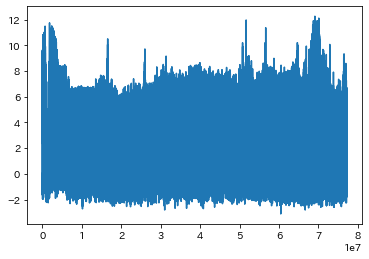

In [31]:
%matplotlib inline
# Check if there's outlier(smaller than -3 and bigger than 3 is usually outlier)
# After Checking there's some values bigger than 3 for example like over 5 but i'll just ignore it this time.
plt.plot(test_stdsc)

In [32]:
np.save(rf"Z:\200 Produced_data\20230113+0117\test_data\_TestData_A_51-60path_spindle_200-300kHz_C",test_stdsc)

In [33]:
len(test_stdsc)

77175120

164.0

# Standardize with A(41-50path / 0-50kHz)